# Final Project: CreditCard Fraud Detection EDA
# Bellevue University
# DSC 530 Data Exploration and Analysis

Background

My final project will focus on CreditCard Fraud Detection Exploratory Data Analysis. The question I intend to analyze is, How many instances and features are there in the dataset?.What is the distribution of the target variable (fraud vs. non-fraud)?Are there any missing values in the dataset? If so, how many and what is their distribution?.What is the correlation between different features in the dataset?.Are there any geographical patterns in the occurrence of fraud transactions?.Is there any difference in the transaction behavior (e.g., transaction amount, transaction frequency) between fraud and non-fraud transactions?.Are there any relationships between the target variable and the other features in the dataset?.Are there any outliers in the dataset? If so, how many and what is their distribution?

Analysis

Import the essential packages (Tried a few different methods from different packages throughout the analysis)

Dataset 
https://www.kaggle.com/datasets/kartik2112/fraud-detection


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.linear_model     import LogisticRegression
from sklearn.ensemble         import RandomForestClassifier
from sklearn.model_selection  import train_test_split,StratifiedShuffleSplit
from sklearn.metrics          import classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,precision_score,recall_score


from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import  Pipeline
from sklearn.ensemble import RandomForestClassifier



In [3]:
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

from matplotlib import rcParams
rcParams.update({'font.size': 8})


In [5]:
df = pd.read_csv('fraudTrain.csv')
df.shape # Approximately around 2.8 million records and 22 variables

(1296675, 23)

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
df.rename(columns = {'unnamed':'ID', 'CC_num':'CreditCard_Num', 'amt': 'Amount'}, inplace = True)

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')


# Categories of date and time
df['Year']=df['trans_date_trans_time'].dt.year
df['Month']=df['trans_date_trans_time'].dt.strftime('%b')
df['Month']=df['trans_date_trans_time'].dt.month
df['Day']=df['trans_date_trans_time'].dt.day
df['Hour']=df['trans_date_trans_time'].dt.hour
df['Weekday']=df['trans_date_trans_time'].dt.strftime('%a')
df['DayofYear']=df['trans_date_trans_time'].dt.dayofyear



In [10]:
Num_of_Fraud = round(df['is_fraud'].value_counts()[1]/len(df)*100,3)
Num_of_NonFraud = round(df['is_fraud'].value_counts()[0]/len(df)*100,3)


print("Number of Fraud Values :\t\t  \t   ",df['is_fraud'].value_counts()[1])
print("Number of Non Fraud Values :\t\t        ",df['is_fraud'].value_counts()[0])
print("\n")
print("Percentage of Fraud transactions :  \t\t ", Num_of_Fraud)
print("Percentage of Normal(Non-Fraud) transactions :  ",Num_of_NonFraud)

Number of Fraud Values :		  	    7506
Number of Non Fraud Values :		         1289169


Percentage of Fraud transactions :  		  0.579
Percentage of Normal(Non-Fraud) transactions :   99.421


In [11]:
# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 
fraud_df = df.loc[df['is_fraud'] == 1]
non_fraud_df = df.loc[df['is_fraud'] == 0]

normal_distributed_df = pd.concat([fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,Amount,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Year,Month,Day,Hour,Weekday,DayofYear
1065820,1065820,2020-03-17 23:36:02,213154573301411,fraud_Heathcote LLC,shopping_net,980.76,Christopher,Sheppard,M,39218 Baker Shoals,Bristow,IN,47515,38.1981,-86.6821,965,Horticultural therapist,1982-02-10,525ee8f4a93966291e2d24554c749ea7,1363563362,37.749660,-87.437968,1,2020,3,17,23,Tue,77
521397,521397,2019-08-12 18:39:18,4294040533480516,fraud_Abshire PLC,entertainment,413.75,Gail,Weaver,F,979 Stewart Lake,New Ellenton,SC,29809,33.4130,-81.6900,2206,Biomedical scientist,1986-12-31,4bc7f75bcea48a3979f8925a891a6aa6,1344796758,33.367925,-81.736367,1,2019,8,12,18,Mon,224
1202397,1202397,2020-05-17 22:01:45,30103132002433,"fraud_Medhurst, Cartwright and Ebert",personal_care,21.00,Stephanie,Middleton,F,99736 Rose Shoals Apt. 504,Morrisdale,PA,16858,41.0001,-78.2357,3688,Dispensing optician,1987-10-26,0417c1d680e0db41bb7d788db9378771,1368828105,41.489279,-78.305863,1,2020,5,17,22,Sun,138
146235,146235,2019-03-20 00:49:42,30131826429364,"fraud_Greenholt, Jacobi and Gleason",gas_transport,8.47,Brianna,Foley,F,57256 Raymond Ports,Knoxville,TN,37932,35.9335,-84.1481,391389,"Designer, industrial/product",1994-04-22,b08c79be5c560452ba32d08f29b2f46f,1332204582,35.565623,-84.992306,1,2019,3,20,0,Wed,79
133786,133786,2019-03-14 22:03:59,4383521454815,"fraud_Mosciski, Ziemann and Farrell",shopping_net,964.32,John,Robertson,M,209 Austin Stream Apt. 231,Indianapolis,IN,46290,39.9347,-86.1633,910148,Academic librarian,1987-09-22,cebec3a646f32a2563ecc6498e8c0b41,1331762639,40.183257,-85.921964,1,2019,3,14,22,Thu,73


# Descriptive Statistical Analysis

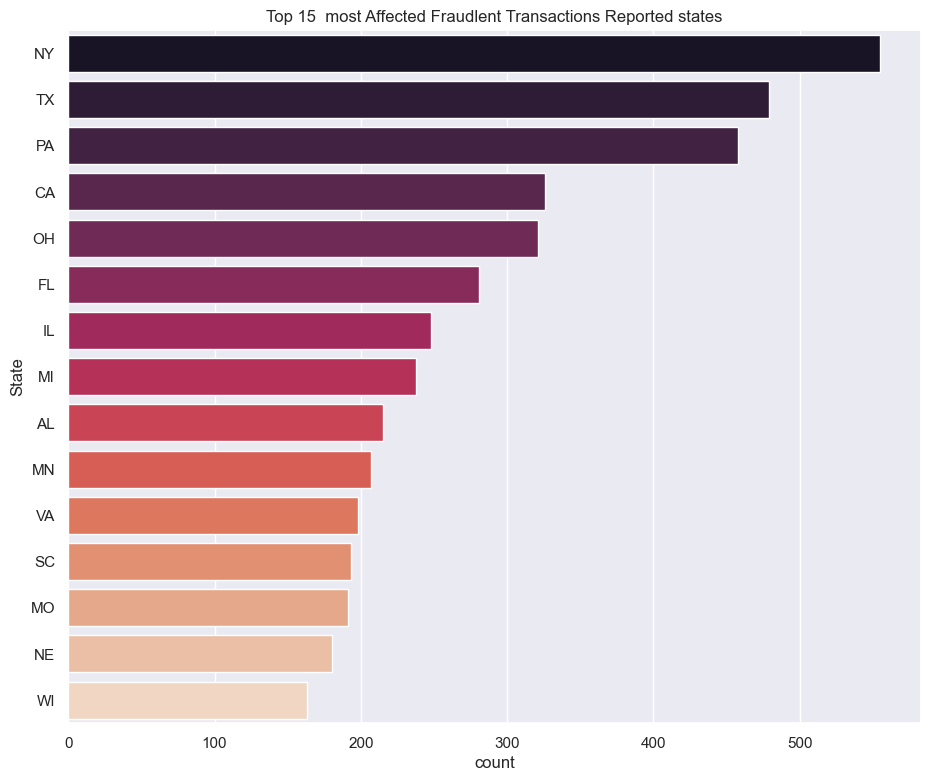

<Figure size 1100x900 with 0 Axes>

In [12]:
# 15 most Affected Fraudlent Transactions Occured states 
state_count15=new_df["state"].value_counts().sort_values(ascending=False)[:15]
sns.set_style('white')
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(x=state_count15.values,y=state_count15.index, palette='rocket')
plt.xlabel('count')
plt.ylabel('State')
plt.title("Top 15  most Affected Fraudlent Transactions Reported states")
plt.show()
plt.savefig('states_plot.jpg', bbox_inches='tight', dpi=150)

# Time Based analysis

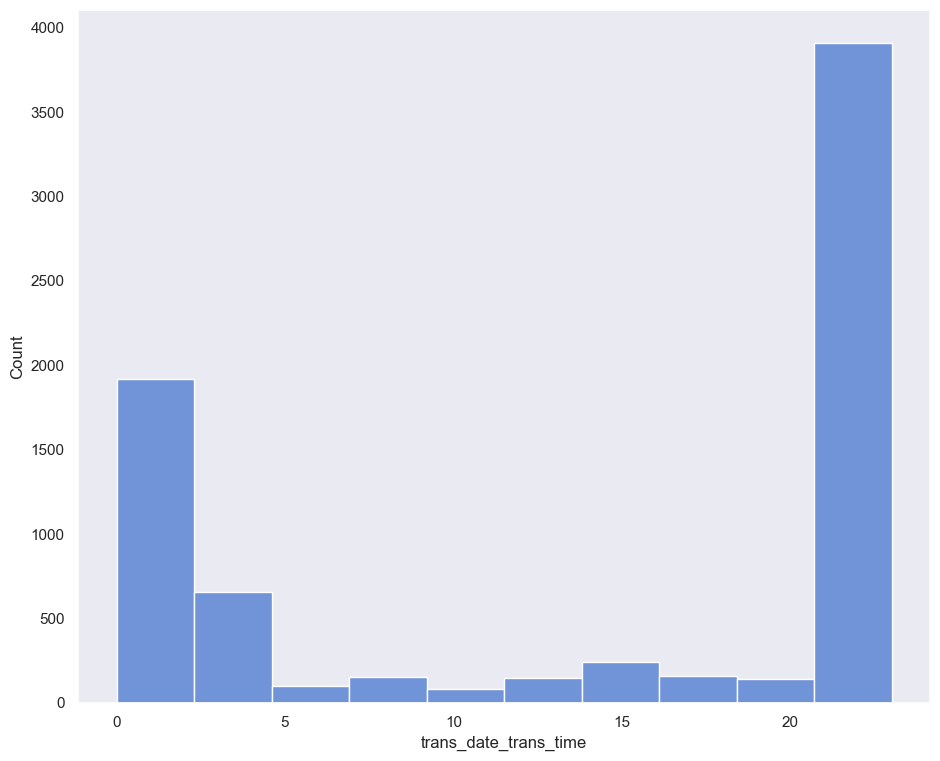

In [13]:
new_df['trans_dte_trans_time']= pd.to_datetime(new_df.trans_date_trans_time)
hr = new_df.trans_date_trans_time.dt.hour
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.histplot(hr,bins=10);

<AxesSubplot:xlabel='Month', ylabel='Fraudlent Transactions Occured'>

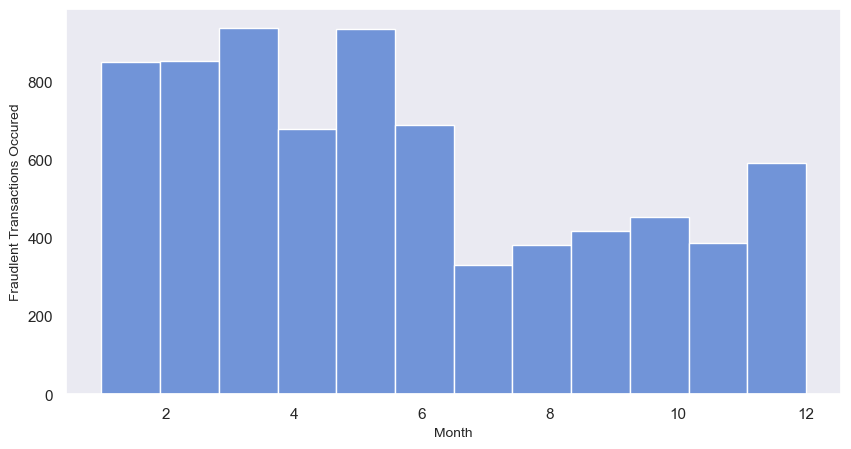

In [14]:
plt.figure(figsize=(10,5))
plt.ylabel('Fraudlent Transactions Occured', fontsize=10)
plt.xlabel('Month', fontsize=10)

# Number of Fraudelent transactions by week
sns.histplot(new_df.Month, bins=12, kde=False) 

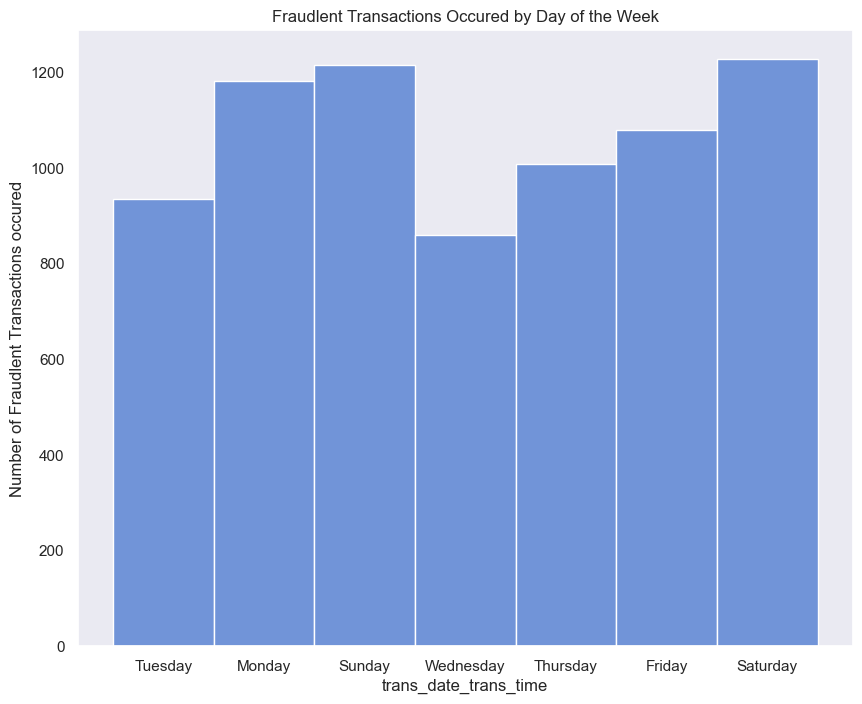

In [15]:
#Fraudlent Transactions occurence by day of week
days = new_df.trans_date_trans_time.dt.day_name()
fig, axs = plt.subplots(figsize=(10,8))
sns.histplot(days,kde=False);
plt.ylabel('Number of Fraudlent Transactions occured')
plt.title('Fraudlent Transactions Occured by Day of the Week')
plt.show();

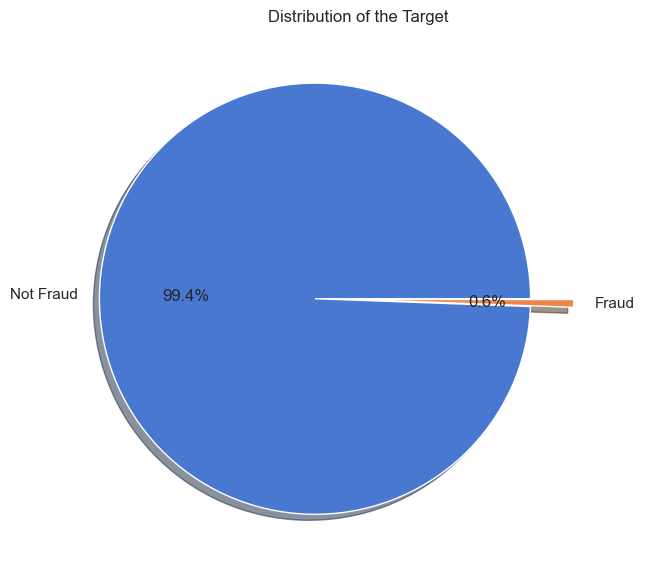

In [16]:
# Check is_fraud variables that has 0 value for Genuine transactions and 1 for Fraud

plt.figure(figsize = [7,7])
plot_var = df['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['Not Fraud','Fraud'], 
        explode = [0.2, 0], 
        shadow = True) # plotting the pie chart
plt.title('Distribution of the Target');



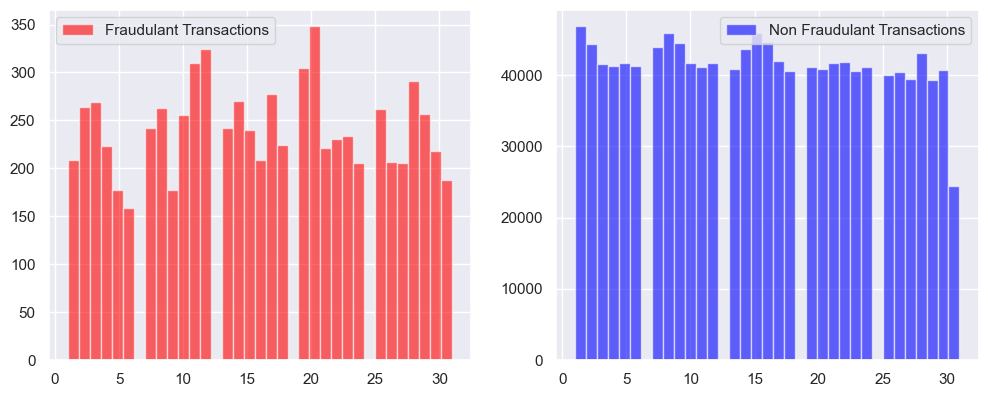

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df[df.is_fraud == 1].Day.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transactions")
plt.legend()

plt.subplot(2, 2, 2)
df[df.is_fraud == 0].Day.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transactions")
plt.legend()

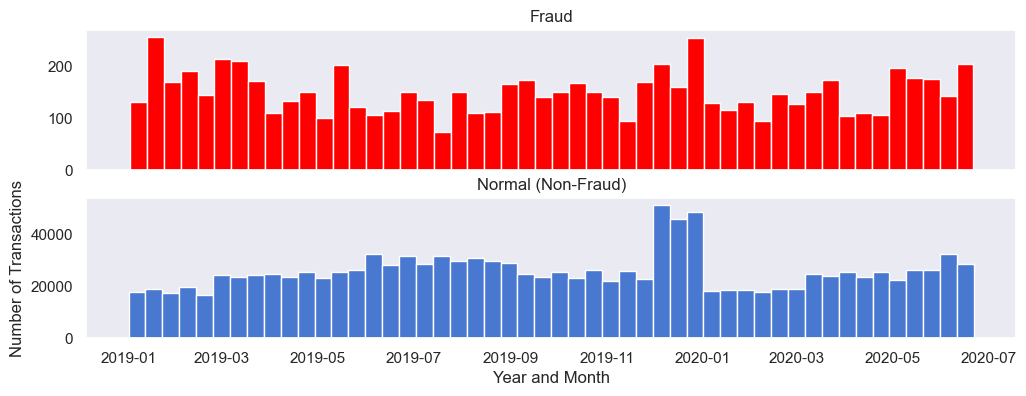

In [18]:
# now checking Time value in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

axis_1.hist(df.trans_date_trans_time[df.is_fraud == 1], bins = bins, color='red')
axis_1.set_title('Fraud')

axis_2.hist(df.trans_date_trans_time[df.is_fraud == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Year and Month')
plt.ylabel('Number of Transactions')
plt.show()



# Inspect the Target variable

,count,distribution
genuine,1289169,99.421135
fraud,7506,0.578865


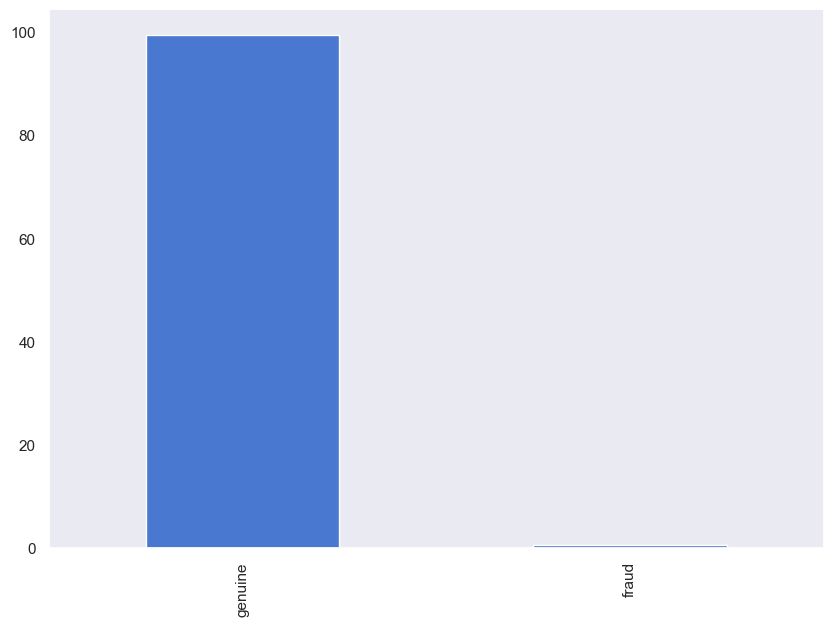

In [19]:
a = df['is_fraud'].value_counts().rename('count') # count of classes
b = (df['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem

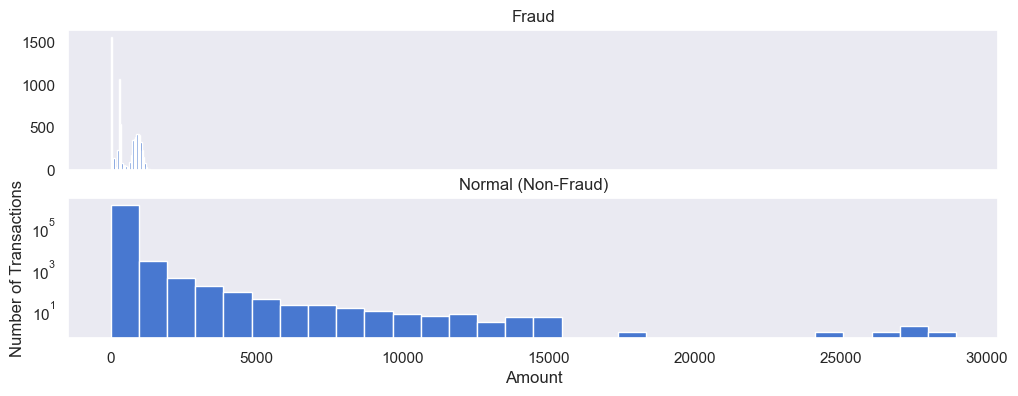

In [20]:
# now checking Amount in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(df.Amount[df.is_fraud == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(df.Amount[df.is_fraud == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()

# we can see here that fraud transactions are of smaller amount. but this cant be used solely because normal transactions 
# too have a lot of transactions of smaller amount. 

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: Amount, dtype: float64


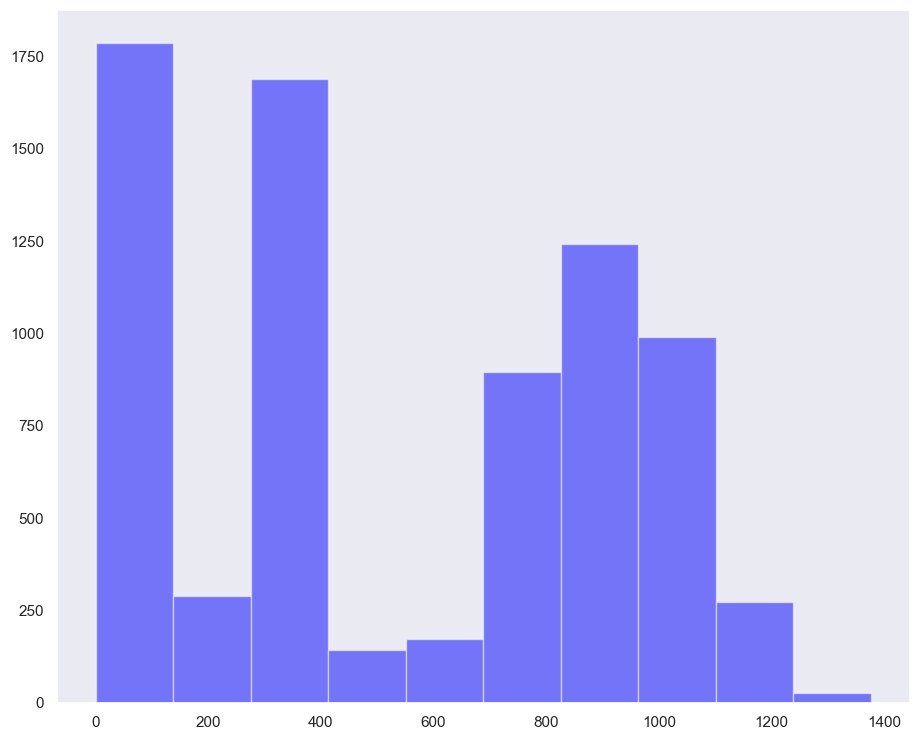

In [21]:
# Fraud data looks interesting , lets look into it a bit more
# lets see the transaction amount in case Fraud at a smaller scale.

print(df.Amount[df.is_fraud == 1 ].describe())
plt.hist(df.Amount[df.is_fraud == 1 ], 10, facecolor='blue', alpha=0.5)
plt.show()

# Imbalanced Correlation

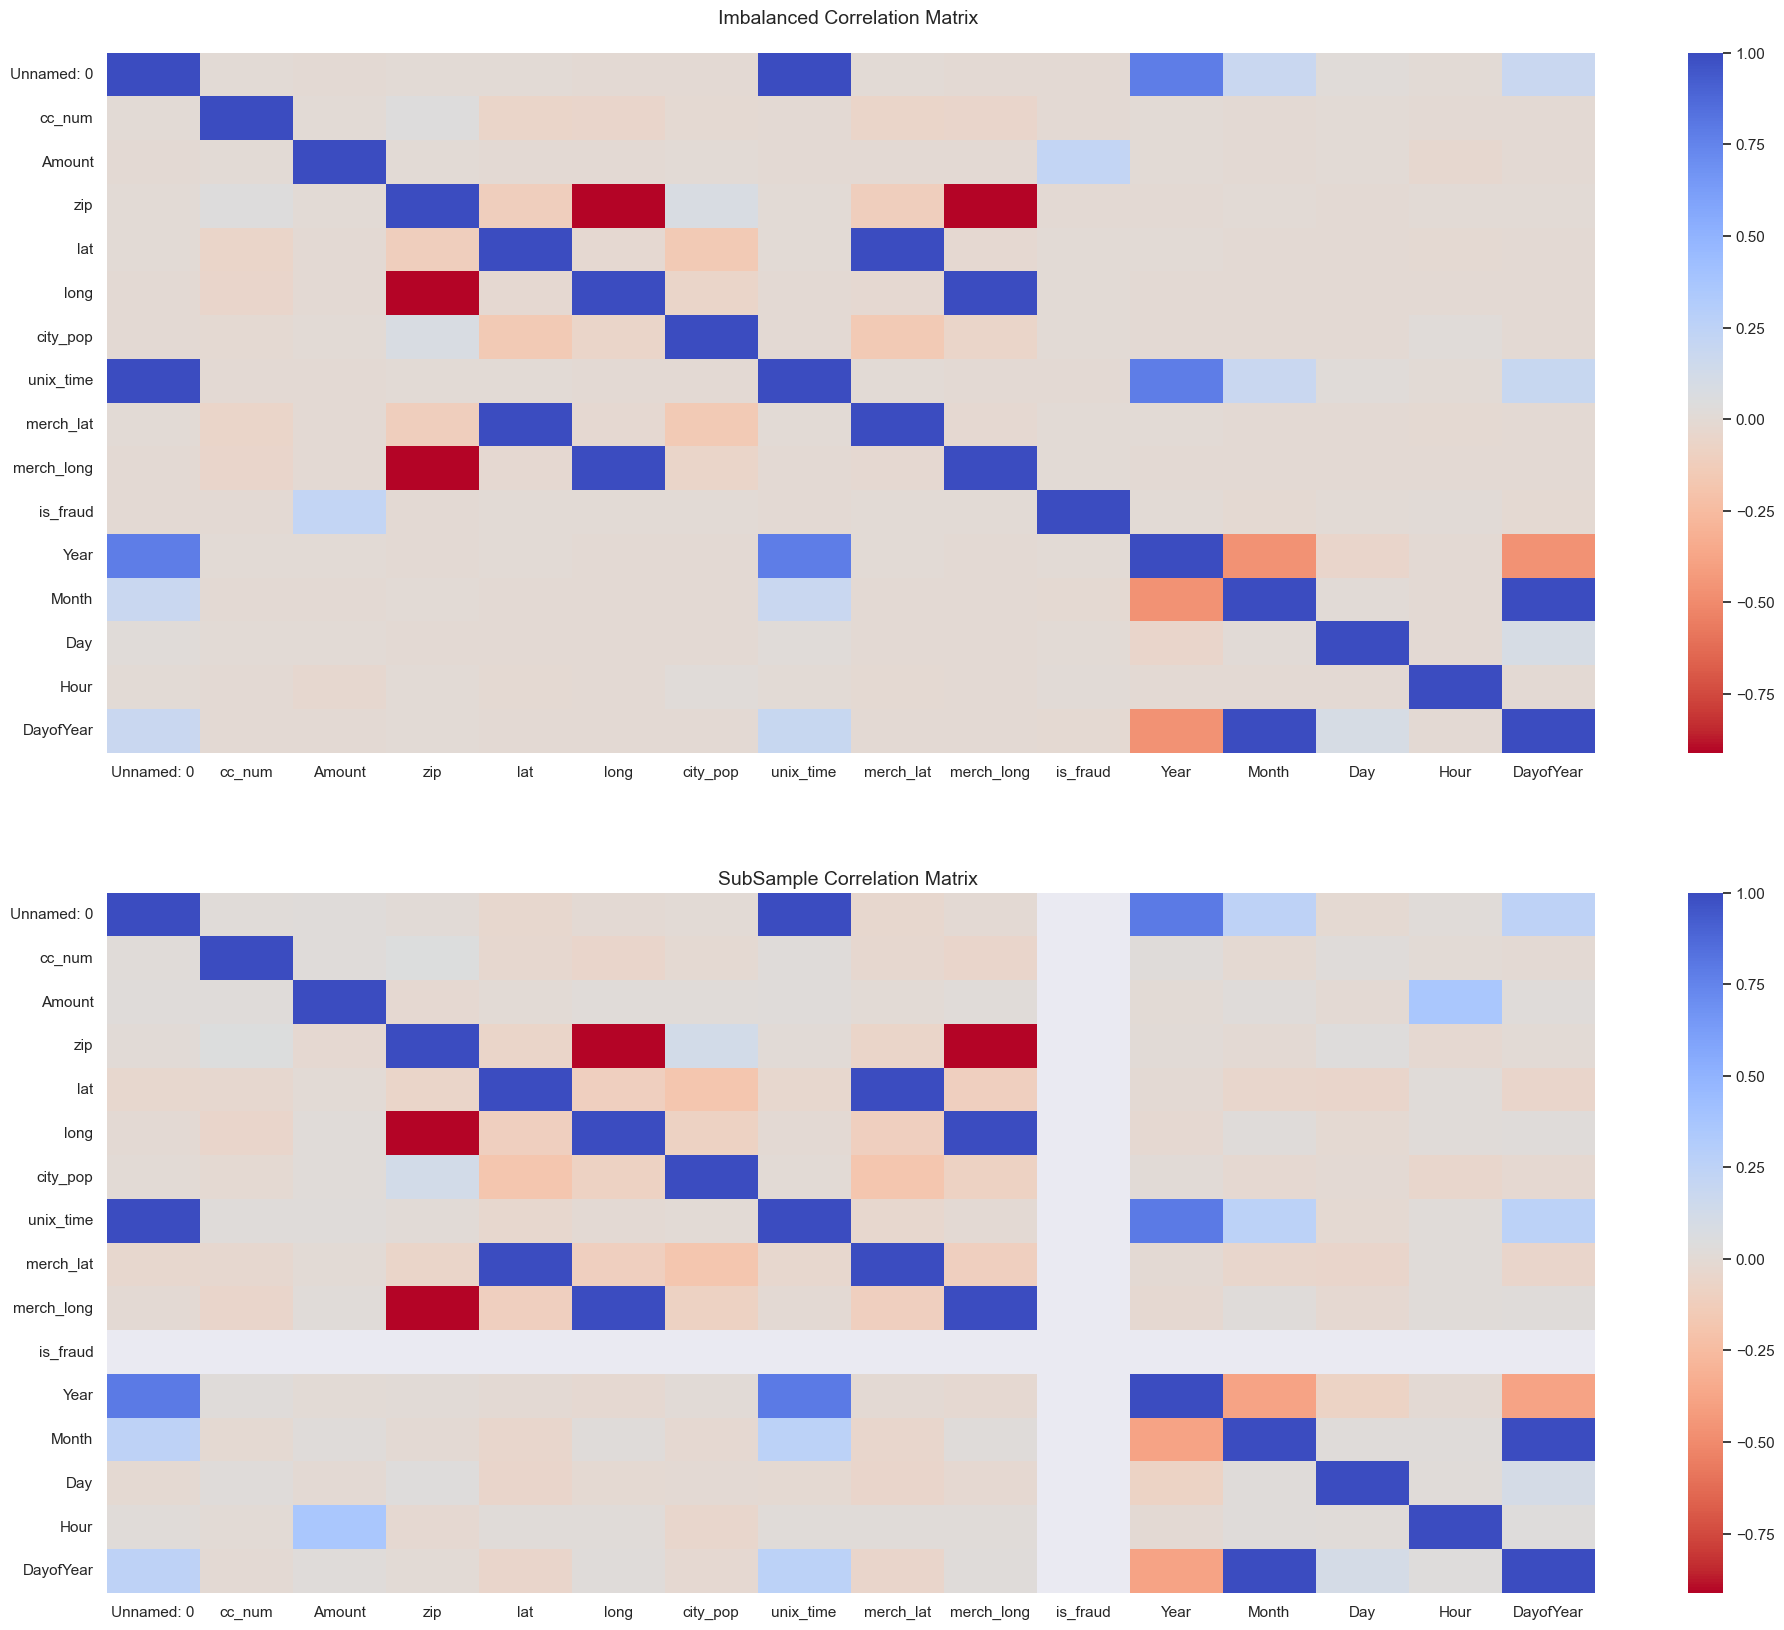

In [22]:
# Entire DataFrame
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix ', fontsize=14)
plt.show()

# Covariance

Covariance between Fraud Transactions and Amount:  2.668391390485763
          is_fraud        Amount
is_fraud  0.005755      2.668391
Amount    2.668391  25701.232223


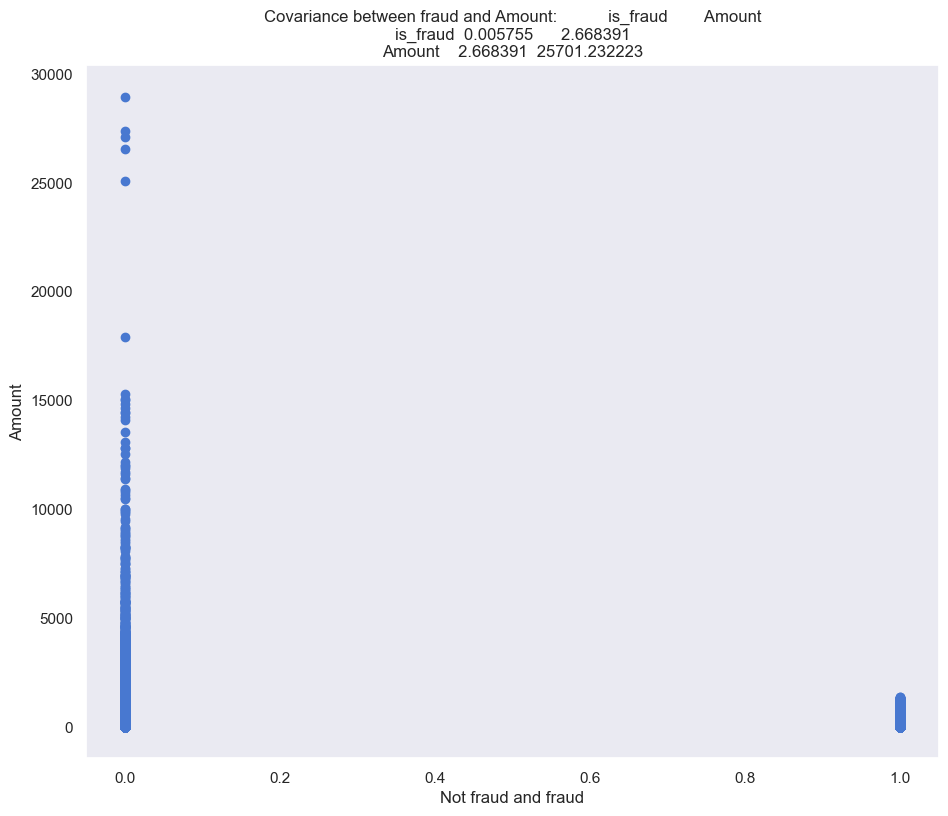

In [23]:
#np.cov(df.is_fraud,df.amount)
np.cov(df.Amount[df.is_fraud == 1])
print("Covariance between Fraud Transactions and Amount: ",df.Amount.cov(df.is_fraud == 1))

# Select the "Class" and "Amount" columns
is_fraud_amount = df[["is_fraud", "Amount"]]

# Calculate the covariance
covariance = is_fraud_amount.cov()

print(covariance)

# Create a scatter plot
plt.scatter(df["is_fraud"], df["Amount"])
plt.xlabel("Not fraud and fraud")
plt.ylabel("Amount")
plt.title(f"Covariance between fraud and Amount: {covariance}")
plt.show()


# Pearson's correlation

is_fraud      1.000000
Amount        0.219404
Hour          0.013799
Day           0.003848
Year          0.003004
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
cc_num       -0.000981
zip          -0.002162
Unnamed: 0   -0.004767
unix_time    -0.005078
DayofYear    -0.011974
Month        -0.012409
Name: is_fraud, dtype: float64
Pearson's correlation coefficient between Not fraud, Fraud and Amount:  0.219403888958873


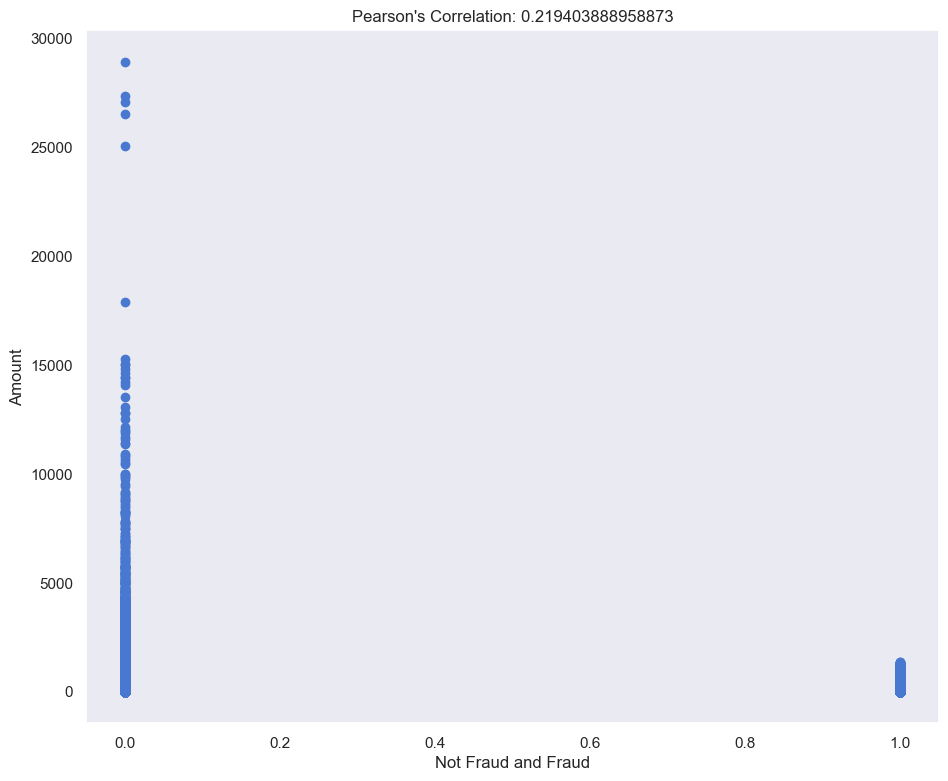

In [24]:
# Drop any missing data
df.dropna(inplace=True)

# Calculate Pearson's correlation coefficient
corr_matrix = df.corr(method='pearson')
fraud_corr = corr_matrix['is_fraud'].sort_values(ascending=False)

# Print the correlation values for each feature in descending order
print(fraud_corr)

# Calculate Pearson's correlation coefficient
correlation = df["is_fraud"].corr(df["Amount"], method="pearson")
print("Pearson's correlation coefficient between Not fraud, Fraud and Amount: ", correlation)

# Create a scatter plot
plt.scatter(df["is_fraud"], df["Amount"])
plt.xlabel("Not Fraud and Fraud")
plt.ylabel("Amount")
plt.title(f"Pearson's Correlation: {correlation}")
plt.show()

# Cumulative Distribution Function

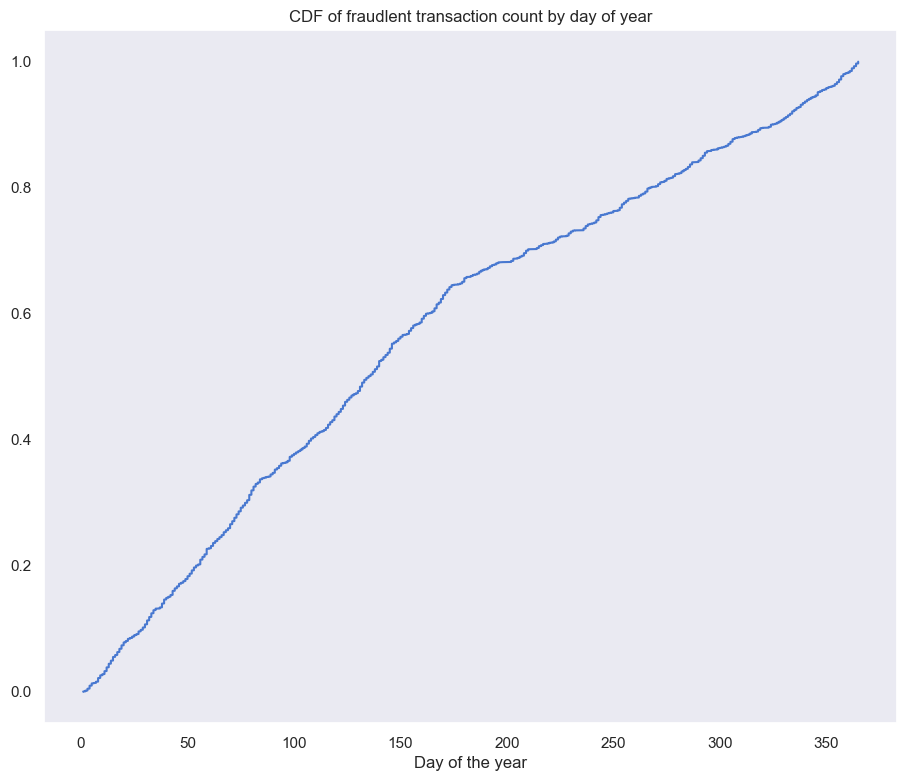

In [25]:

data = new_df.DayofYear
# sort the data in ascending order
x = np.sort(data)
# get the cdf values of y
y = np.arange(len(x))/float(len(x)-1)

# plotting
plt.xlabel('Day of the year')
plt.title('CDF of fraudlent transaction count by day of year')
plt.plot(x, y)




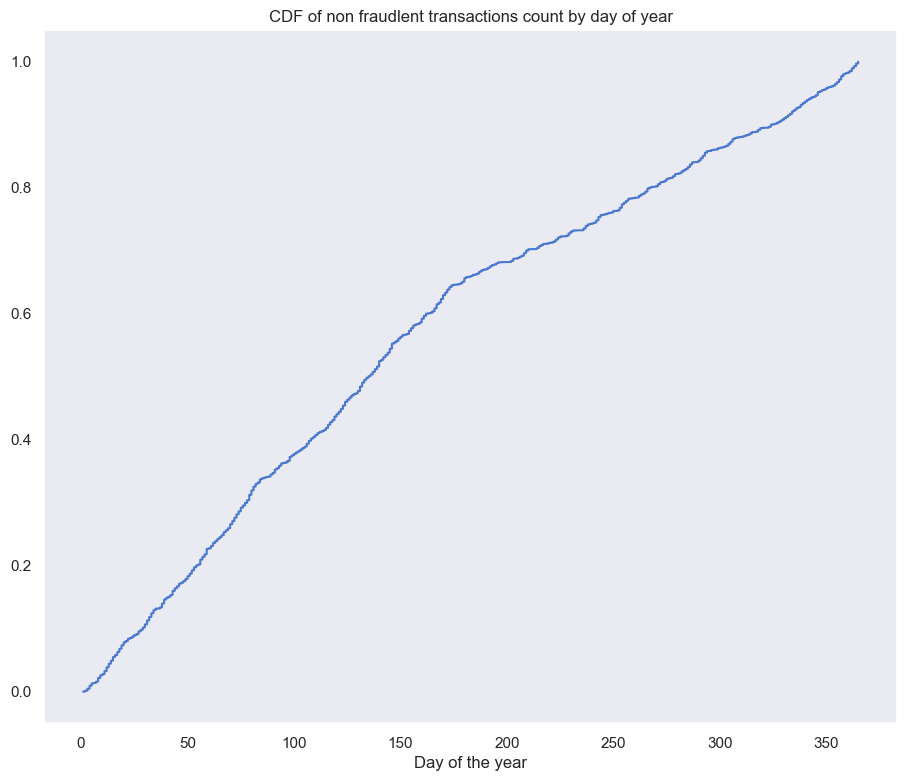

In [26]:
# data = df.DayofYear
# sort the data in ascending order
x = np.sort(data)
# get the cdf values of y
y = np.arange(len(x))/float(len(x)-1)

# plotting
plt.xlabel('Day of the year')
plt.title('CDF of non fraudlent transactions count by day of year')
plt.plot(x, y)

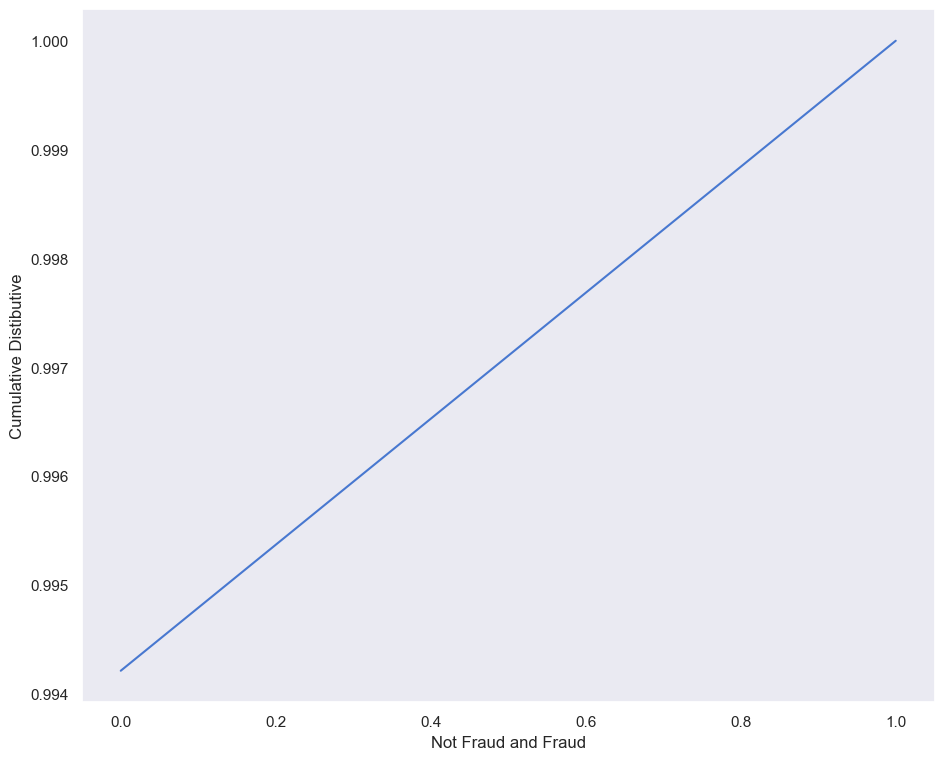

In [27]:

# Create a new dataframe containing only the "is_fraud" column
#class_df = df[["Class"]]

# Calculate the CDF
cdf = df["is_fraud"].value_counts(normalize=True).sort_index().cumsum()

# Plot the CDF
cdf.plot()
plt.xlabel("Not Fraud and Fraud")
plt.ylabel("Cumulative Distibutive")
plt.show()


# Scatter Plot 

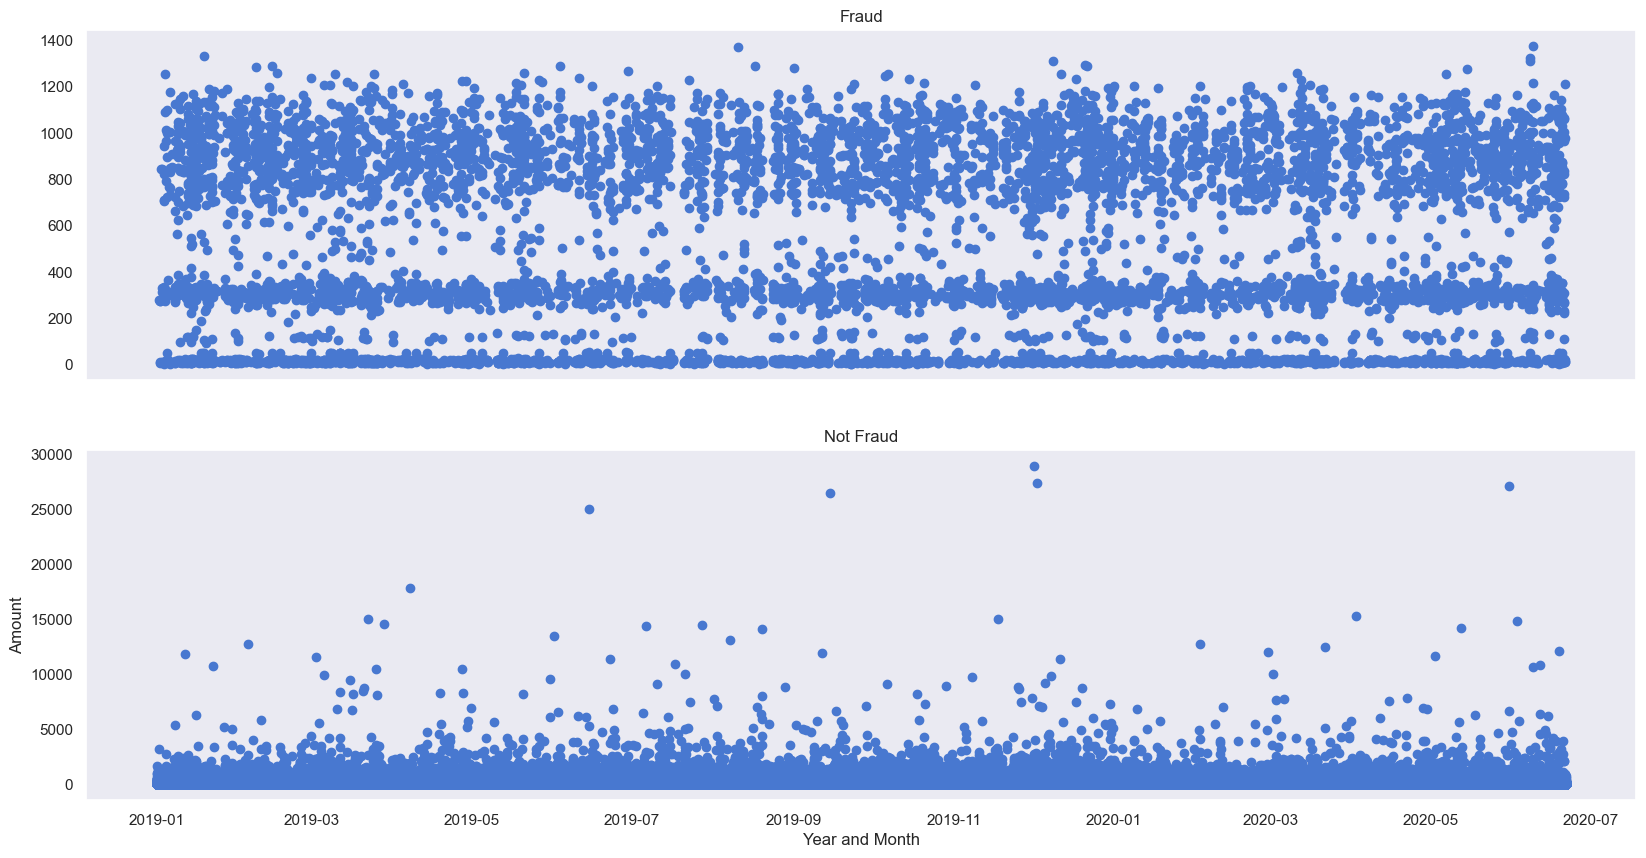

In [28]:
# checking Date and TIme vs Amount feature. scatter plot

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

axis_1.scatter(df.trans_date_trans_time[df.is_fraud == 1], df.Amount[df.is_fraud == 1])
axis_1.set_title('Fraud')

axis_2.scatter(df.trans_date_trans_time[df.is_fraud == 0], df.Amount[df.is_fraud == 0])
axis_2.set_title('Not Fraud')

plt.xlabel('Year and Month')
plt.ylabel('Amount')
plt.show()



# Probability Mass Function

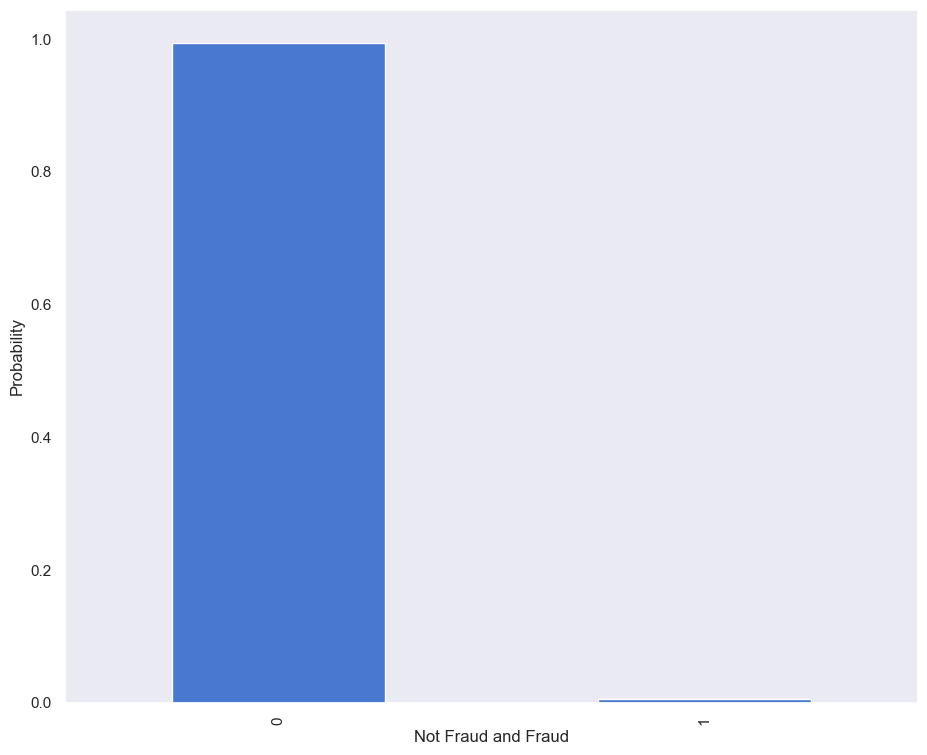

In [29]:

# Create a new dataframe containing only the "is fraud" column
class_df = df[["is_fraud"]]

# Calculate the probability mass function
pmf = class_df["is_fraud"].value_counts(normalize=True)

# Plot the probability mass function
pmf.plot(kind="bar")
plt.xlabel("Not Fraud and Fraud")
plt.ylabel("Probability")
plt.show()


# Normal Distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


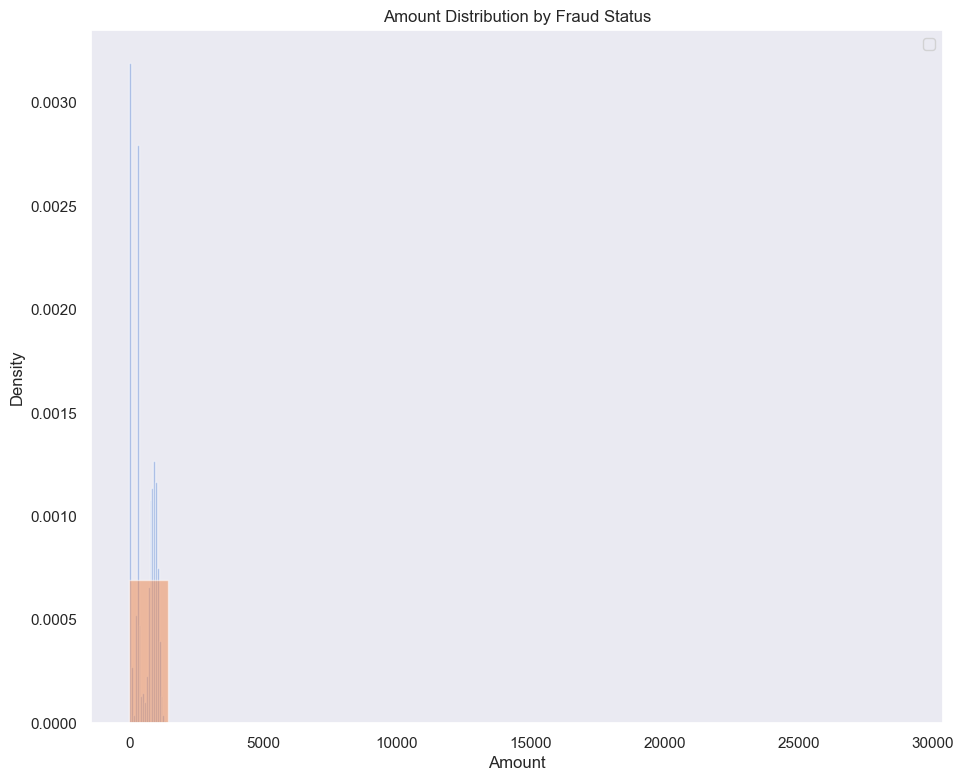

In [30]:

# Separate the data by fraud and not fraud
fraud_data = df[df['is_fraud'] == 1]
not_fraud_data = df[df['is_fraud'] == 0]

# Calculate the mean and standard deviation for amount for fraud and not fraud
fraud_amount_mean = np.mean(df['Amount'])
fraud_amount_std = np.std(df['Amount'])
not_fraud_amount_mean = np.mean(df['Amount'])
not_fraud_amount_std = np.std(df['Amount'])

# Create normal distribution plots for amount for fraud and not fraud
plt.hist(fraud_data['Amount'], bins=20, density=True, alpha=0.5)
plt.hist(not_fraud_data['Amount'], bins=20, density=True, alpha=0.5)
plt.legend()
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()



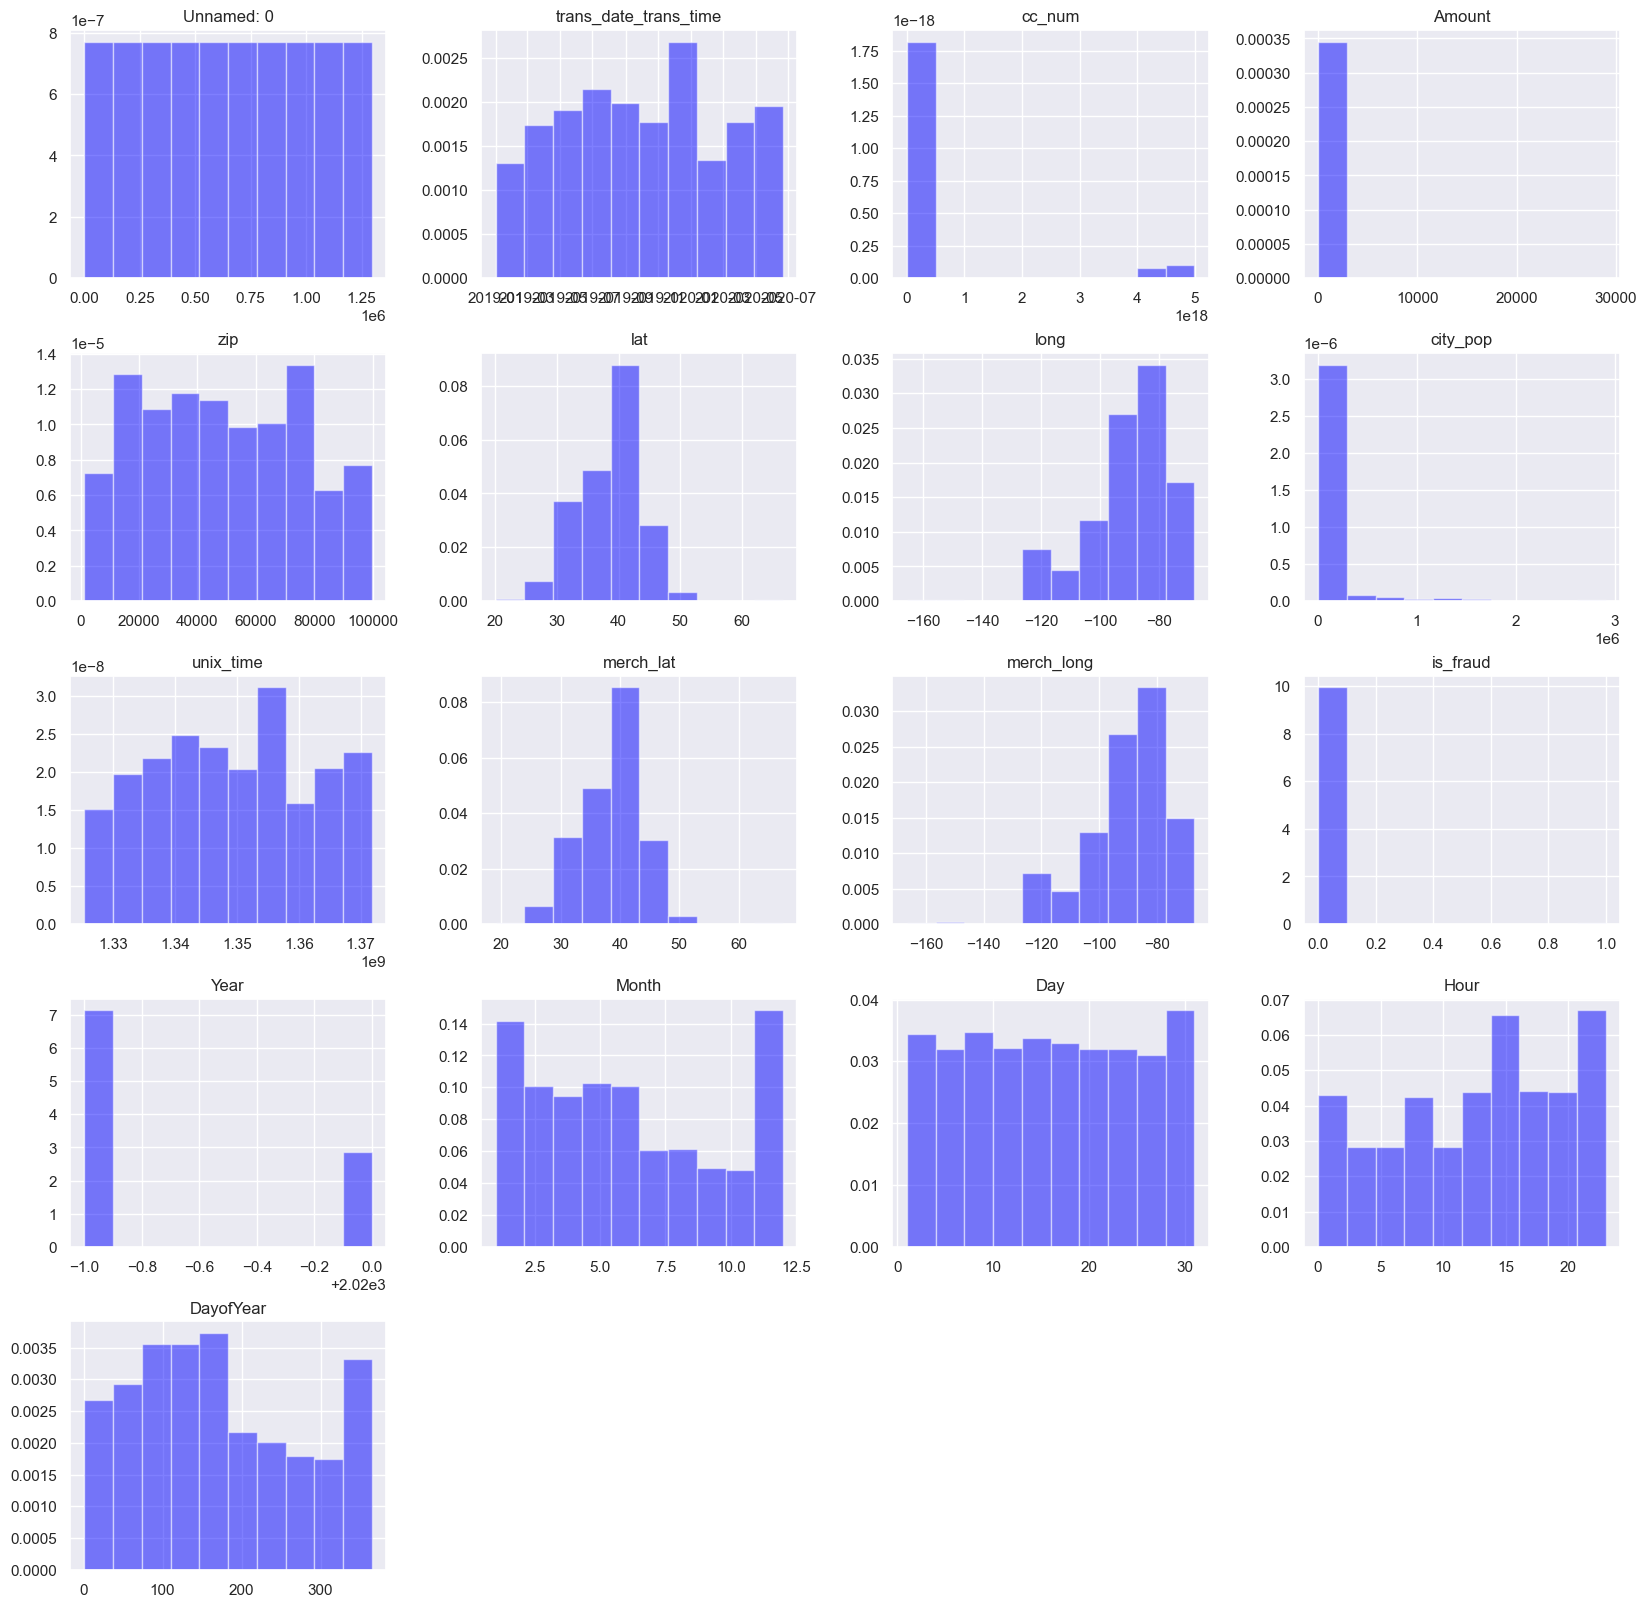

In [31]:
#plot histogram of each parameter
df.hist(figsize=(20,20),
         facecolor='blue',
       density=True,
       alpha=0.5)
plt.show()


In [32]:
x=df.iloc[:,:-1]
y=df.iloc[:,len(df.columns)-1]
ncols  = ['zip','lat','city_pop','is_fraud', 'Amount']
x= x[ncols]
print("x.shape:", x.shape)
print("y.shape:", y.shape)

x.shape: (1296675, 5)
y.shape: (1296675,)


In [33]:
num = int(len(x) * 0.2)
xtrain = x[:-num]
ytrain = y[:-num]
xtest = x[-num:]
ytest = y[-num:]

print("# train:", len(xtrain))
print("# test:", len(xtest))

# train: 1037340
# test: 259335


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386789
           1       0.00      0.00      0.00      2214

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



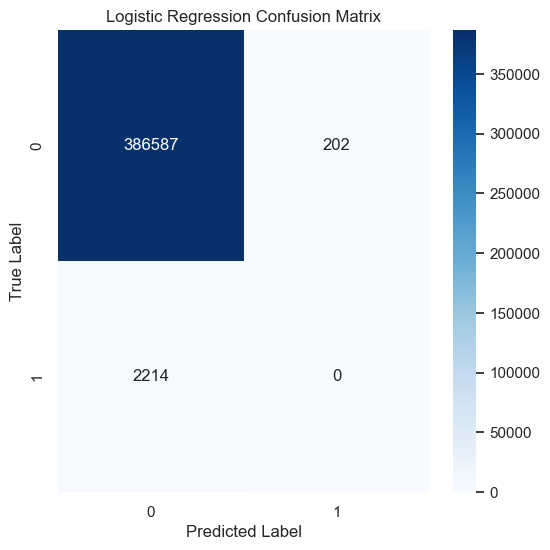

In [34]:

# Separate the features and labels
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Fit a logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = lr.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


# Plot the logistic regression confusion matrix
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()